1. Imports & Data Generation

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#generate synthetic sine wave data
def generate_data(seq_length, total_points):
    x = np.linspace(0,100,total_points)
    y = np.sin(x)
    data = []
    target = []
    for i in range(len(y) - seq_length):
        data.append(y[i:i+seq_length])
        target.append(y[i+seq_length])
    return np.array(data), np.array(target)
seq_length = 20
X,y = generate_data(seq_length, 1000)

#convert to Tensors
X_tensor = torch.tensor(X,dtype=torch.float32).unsqueeze(-1)
y_tensor = torch.tensor(y,dtype=torch.float32).unsqueeze(-1)

print("input shape:", X_tensor.shape)
print("target shape:", y_tensor.shape)

input shape: torch.Size([980, 20, 1])
target shape: torch.Size([980, 1])


2. Define LSTM Model

In [3]:
class LSTMModel(nn.Module):
    def __init__(self, input_size = 1, hidden_size = 50, num_layers = 1, output_size = 1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out 
    
model = LSTMModel()

3. Train the Model

In [4]:
citerion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

#training for 100 epochs
for epoch in range(100):
    output = model(X_tensor)
    loss = citerion(output, y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 0.5508
Epoch 10, Loss: 0.0792
Epoch 20, Loss: 0.0140
Epoch 30, Loss: 0.0029
Epoch 40, Loss: 0.0008
Epoch 50, Loss: 0.0003
Epoch 60, Loss: 0.0001
Epoch 70, Loss: 0.0001
Epoch 80, Loss: 0.0000
Epoch 90, Loss: 0.0000


4. Plot the Prediction

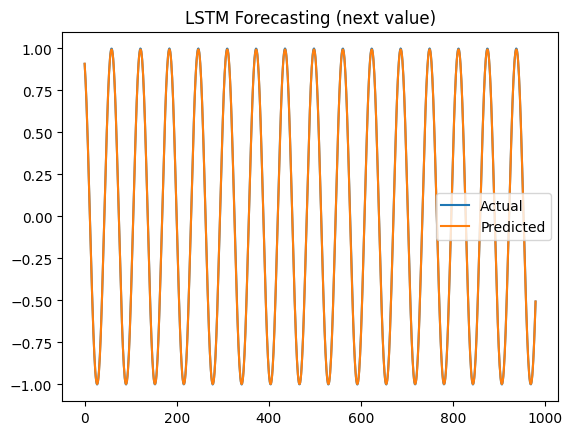

In [5]:
# predict and plot
model.eval()
with torch.no_grad():
    predicted  = model(X_tensor).numpy()

plt.plot(y, label ="Actual")
plt.plot(predicted, label="Predicted")
plt.title("LSTM Forecasting (next value)")
plt.legend()
plt.show()  

Running on: cuda
Epoch 0, Loss: 0.5306
Epoch 10, Loss: 0.0677
Epoch 20, Loss: 0.0046
Epoch 30, Loss: 0.0040
Epoch 40, Loss: 0.0003
Epoch 50, Loss: 0.0004
Epoch 60, Loss: 0.0002
Epoch 70, Loss: 0.0000
Epoch 80, Loss: 0.0000
Epoch 90, Loss: 0.0000


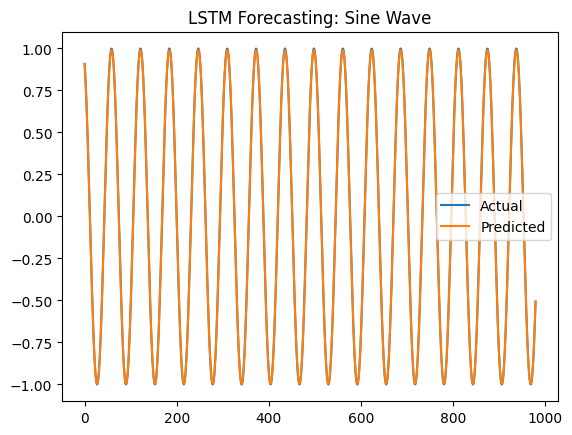

In [6]:
# time_series_forecast/lstm_forecast.py
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Running on:", device)

# 1. Generate sine wave data
def generate_data(seq_length, total_points):
    x = np.linspace(0, 100, total_points)
    y = np.sin(x)
    data, target = [], []
    for i in range(len(y) - seq_length):
        data.append(y[i:i+seq_length])
        target.append(y[i+seq_length])
    return np.array(data), np.array(target)

seq_length = 20
X, y = generate_data(seq_length, 1000)

# 2. Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(-1).to(device)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(-1).to(device)

# 3. Define LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=1, output_size=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])

model = LSTMModel().to(device)

# 4. Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# 5. Training loop
for epoch in range(100):
    model.train()
    output = model(X_tensor)
    loss = criterion(output, y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# 6. Prediction and plotting
model.eval()
with torch.no_grad():
    predicted = model(X_tensor).squeeze().cpu().numpy()
    actual = y_tensor.squeeze().cpu().numpy()

plt.plot(actual, label='Actual')
plt.plot(predicted, label='Predicted')
plt.title("LSTM Forecasting: Sine Wave")
plt.legend()
plt.show()
